In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load data
df = pd.read_excel(r"E:\MLIoT\ML\dataset\combined_cycle_power_plant_dataset.xlsx")
df.shape

(9568, 5)

### 1. Data Exploration

In [14]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [15]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [17]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### 2. Data Cleaning

In [18]:
# check for duplicates
df.duplicated().sum()

41

In [19]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [20]:
# check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### 3. Feature Engineering

- Feature Extraction
- Feature Selection

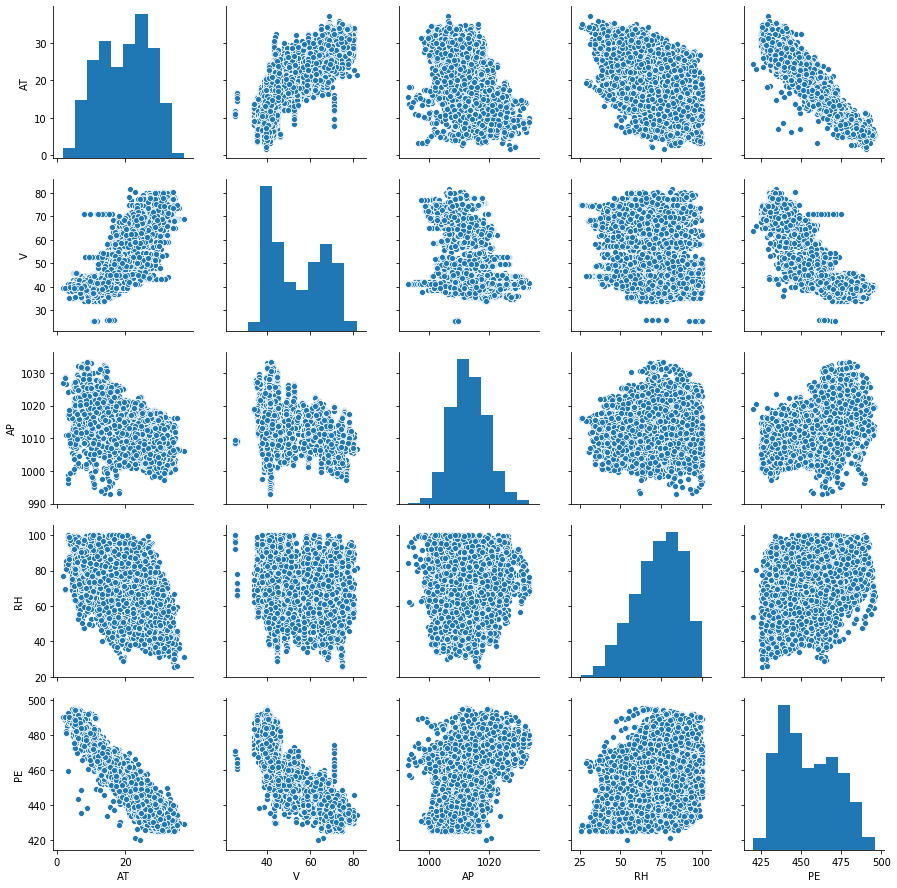

In [21]:
sns.pairplot(df)
plt.show()

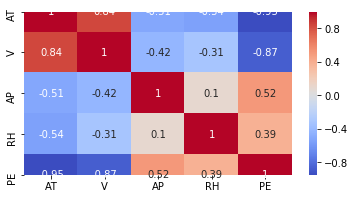

In [22]:
cor = df.corr()
plt.figure(figsize=(6,3))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [23]:
# separate features and label
x = df[['AT',"V","AP",'RH']]
y = df['PE']

### 4. Preprocessing

In [24]:
# split data into train and test set
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(9527, 4)
(7621, 4)
(1906, 4)
(9527,)
(7621,)
(1906,)


### 5. Apply Machine Learning Algorithm

In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
# train the model  with the training data - xtr,ytr
model.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6. Performance Analysis

In [27]:
new_data = np.array([[13.97,39.16,1016.05,84.6]])
model.predict(new_data)

array([467.56116709])

In [28]:
# get prediction for xts
ypred = model.predict(xts)

In [29]:
# calcualting r2 score 
from sklearn.metrics import r2_score
r2_score(yts,ypred)

0.9280623285173403

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yts,ypred)

20.447534287405073

### 8. Export model as a portable file - pickle file

In [31]:
import joblib
# from sklearn.externals import joblib
joblib.dump(model,r"D:/ai/Techtrunk/GIET/feb2020/ccpp_model.pkl")

['D:/ai/Techtrunk/GIET/feb2020/ccpp_model.pkl']